<a href="https://colab.research.google.com/github/LKSfiuza/Machine-Learning-projects/blob/main/Nuvem%20de%20palavras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procenssamento de linguagem natural com Python

##Importação das bibliotecas

In [1]:
import bs4 as bs
import urllib.request
import spacy
import nltk

In [2]:
!python3 -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 63.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Marcação de POS

* POS( Part-of-speech) atribui para as palavras partes da fala, como substantivos adjetivos etc
* Importante para detectar entidades no texto, é necessario para indentificar o conteudo do texto

pln = spacy.load('pt')


In [3]:
pln = spacy.load("pt_core_news_sm")

In [4]:
pln

In [5]:
documento = pln('Uma vez FLamengo sempre Flamengo')

In [6]:
type(documento)

spacy.tokens.doc.Doc

In [7]:
for token in documento:
  print(token.text, token.pos_)

Uma DET
vez NOUN
FLamengo NOUN
sempre ADV
Flamengo PROPN


## Lematização e stemização

In [8]:
for token in documento:
  print(token.text, token.lemma_)

Uma uma
vez vez
FLamengo FLamengo
sempre sempre
Flamengo Flamengo


In [9]:
doc =  pln('encontrei encontraram encontrarão encontrariam cursei curso cursando')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrarir',
 'cursar',
 'curso',
 'cursar']

In [10]:
import nltk
nltk.download('rslp')
stemmer = nltk.stem.RSLPStemmer()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [11]:
stemmer.stem('cursando')

'curs'

In [12]:
for token in documento:
  print(token.text, stemmer.stem(token.text), token.lemma_)

Uma uma uma
vez vez vez
FLamengo flameng FLamengo
sempre sempr sempre
Flamengo flameng Flamengo


## Carregando base de textos

In [13]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
req = urllib.request.Request('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial', headers=headers)
dados = urllib.request.urlopen(req)

In [14]:
dados

In [15]:
dados= dados.read()

In [16]:
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limit

In [17]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featur

In [18]:
paragrafos = dados_html.find_all('p')

len(paragrafos)

79

In [19]:
paragrafos[2].text

'Aplicações de IA incluem mecanismos avançados de busca na web (por exemplo, Google Search); sistemas de recomendação (usados pelo YouTube, Amazon e Netflix); assistentes virtuais (por exemplo, Google Assistant, Siri e Alexa ); veículos autônomos (por exemplo, Waymo); ferramentas generativas e criativas (por exemplo, ChatGPT, DeepSeek e AI art); e jogo e análise sobre-humanos em jogos de estratégia (por exemplo, xadrez e Go). No entanto, muitas aplicações de IA não são percebidas como IA porque já se tornaram comuns o suficiente no cotidiano das pessoas.[9][10] Como por exemplo, o reconhecimento óptico de caracteres (OCR) que extrai o texto de imagens; transforma conteúdo não estruturado em dados estruturados com insights prontos para negócios;[1] tradução de textos em idiomas estrangeiros e tradução de voz.[6]\n'

In [20]:
conteudo = ''

for p in paragrafos:
  conteudo += p.text

In [21]:
conteudo

'Na informática, a Inteligência Artificial (abreviado IA) genericamente é a inteligência, o raciocínio e o aprendizado exibida por máquinas semelhante ao raciocino humano;[1][2] busca desenvolver máquinas autônomas ou sistemas especialistas capazes de simular o pensamento humano e realizar várias tarefas complexas de forma independente.[3][4][5] É o sistema que permite aos computadores executar funções avançadas, como a capacidade de analisar dados em grande escala e fazer previsões/recomendações;[1][6] É um campo de pesquisa em ciência da computação que desenvolve e estuda métodos e softwares que permitem que as máquinas percebam seu ambiente e usem o aprendizado e a inteligência para tomar ações que maximizem suas chances de atingir objetivos definidos.[7] A IA iniciou na década de 1950 com os pesquisadores Alan Turing e Herbert Simon baseado no conceito do filósofo grego Aristóteles.\nEm 1950, o matemático inglês Allan Turing escreveu sobre ser possível uma máquina pensar, e imitar 

In [22]:
# Retirar letras maiuculas para evitar confusão do algoritimo ex: ele, Ele

conteudo = conteudo.lower()

# Buscas em texto com spaCy

In [23]:
pln = spacy.load('pt_core_news_sm')

In [24]:
string = 'turing'
token_pesquisa = pln(string)

In [25]:
pln.vocab

In [26]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [27]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 130, 131),
 (8661325627334373315, 150, 151),
 (8661325627334373315, 837, 838),
 (8661325627334373315, 846, 847),
 (8661325627334373315, 883, 884),
 (8661325627334373315, 1025, 1026),
 (8661325627334373315, 4427, 4428),
 (8661325627334373315, 4437, 4438),
 (8661325627334373315, 4593, 4594),
 (8661325627334373315, 4598, 4599),
 (8661325627334373315, 4604, 4605),
 (8661325627334373315, 4667, 4668),
 (8661325627334373315, 5164, 5165),
 (8661325627334373315, 6747, 6748),
 (8661325627334373315, 6771, 6772),
 (8661325627334373315, 6880, 6881),
 (8661325627334373315, 6975, 6976),
 (8661325627334373315, 7092, 7093)]

In [28]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 130, 131), 130, 131)

In [29]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)
display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f""" <p><strong>Resultados encontrados:</strong>{len(matches)} </p>"""))

for i in matches:
  inicio =  i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f'<mark>{string}</mark>')
  texto += '<br><br>'
display(HTML(f"""<p>{texto}</p>"""))

# Extração de entidades nomeadas

* NER ( Named-Entity Recognition )
* Encontrar e classificar entidades no texto

In [30]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)
#

alan turing PER
herbert simon PER
aristóteles PER
allan turing PER
google search MISC
youtube MISC
amazon ORG
netflix PER
google assistant MISC
siri PER
waymo PER
go LOC
história,[14 MISC
aristóteles PER
alexandre PER
allan turing PER
herbert simon PER
john mccarthy PER
turing PER
computing machinery and inteiligence MISC
humano.[18 MISC
possível.[18 PER
herbert simon PER
allen newell PER
turing PER
herbert simon PER
allen newell PER
the simulation of human thought MISC
brasil LOC
allen newell PER
herbert simon PER
marvin minsky PER
mit ORG
lab MISC
darthmouth LOC
defense advanced research MISC
estados unidos LOC
fifth generation MISC
” MISC
japão LOC
prolog MISC
neurônios,[25 ORG
aleatórios.[26 ORG
transformers,[28 ORG
google ORG
wikipédia MISC
john mccarthy PER
racionalmente".[4][5 PER
andreas kaplan PER
michael haenlein PER
john mccarthy PER
román LOC
john haugeland PER
w. grey walter PER
johns hopkins PER
universidade de princeton ORG
ratio club LOC
inglaterra LOC
david rumelhart P

In [31]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)


# Nuvem de palavras e stop words

In [33]:
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])
cloud = WordCloud(background_color='white',max_words=100,colormap=color_map)

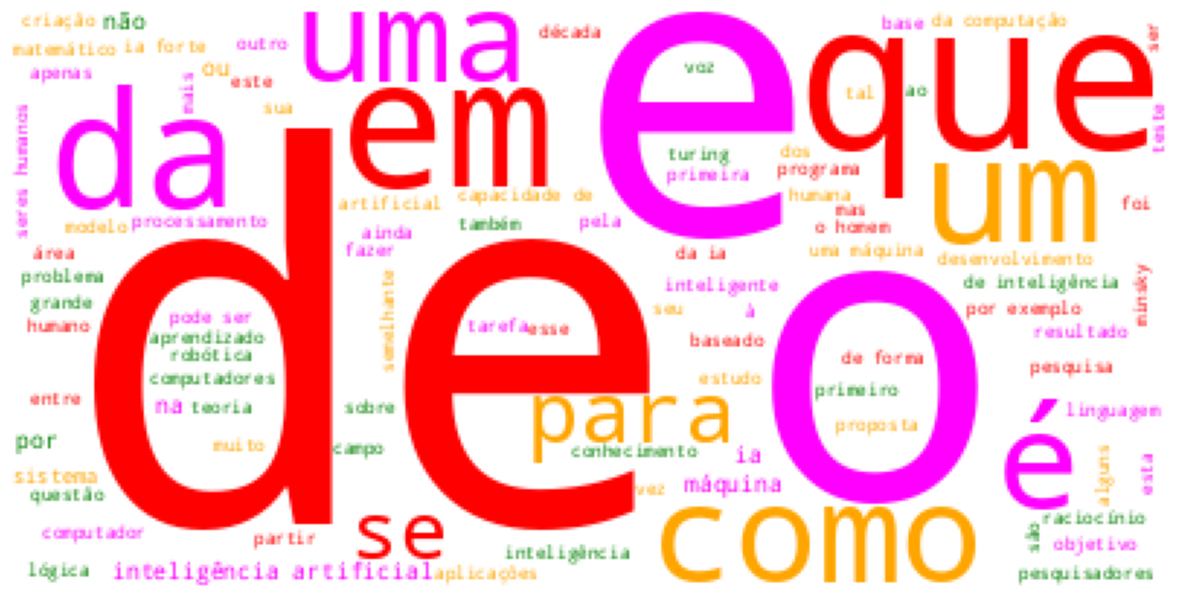

In [34]:
import matplotlib.pyplot as plt
cloud = cloud.generate(conteudo)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

  ____________________________________________________________________________
  .
  .
 * A primeira nuvem mostra um resultado pouco proveitoso devido as STOPWORDS como DE , DA, QUE, O, EM, UMA.

.
.
 ____________________________________________________________________________

In [35]:
# Corrigindo

from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'maior', 'maioria', 'foram', 'sim', 'tenho', 'minha', 'fostes', 'possivelmente', 'onze', 'elas', 'aquela', 'estas', 'atrás', 'daquele', 'em', 'alguns', 'fará', 'algo', 'aqui', 'contra', 'mês', 'geral', 'foste', 'grupo', 'porquê', 'inclusive', 'tu', 'oito', 'teve', 'com', 'estão', 'números', 'fazemos', 'seus', 'comprido', 'portanto', 'cuja', 'teus', 'questão', 'outras', 'sétimo', 'desde', 'vem', 'quatro', 'pode', 'outros', 'esta', 'da', 'dezassete', 'das', 'quarta', 'dez', 'novas', 'parece', 'essas', 'deste', 'estás', 'pontos', 'dizer', 'vai', 'boa', 'nesta', 'uns', 'dezasseis', 'nenhuma', 'tanta', 'isso', 'se', 'sou', 'demais', 'doze', 'aquilo', 'só', 'depois', 'último', 'corrente', 'dezanove', 'vos', 'disso', 'faço', 'fui', 'põem', 'breve', 'obrigada', 'ter', 'talvez', 'for', 'eventual', 'conhecida', 'sua', 'muito', 'partir', 'bastante', 'estes', 'fez', 'que', 'vez', 'saber', 'dessa', 'querem', 'este', 'estar', 'fora', 'fazem', 'puderam', 'ao', 'nível', 'um', 'vezes', 'usa', 'treze',

In [37]:
doc = pln(conteudo)
lista_token=[]
for token in doc:
  lista_token.append(token.text)
print(lista_token)


['na', 'informática', ',', 'a', 'inteligência', 'artificial', '(', 'abreviado', 'ia', ')', 'genericamente', 'é', 'a', 'inteligência', ',', 'o', 'raciocínio', 'e', 'o', 'aprendizado', 'exibida', 'por', 'máquinas', 'semelhante', 'ao', 'raciocino', 'humano;[1][2', ']', 'busca', 'desenvolver', 'máquinas', 'autônomas', 'ou', 'sistemas', 'especialistas', 'capazes', 'de', 'simular', 'o', 'pensamento', 'humano', 'e', 'realizar', 'várias', 'tarefas', 'complexas', 'de', 'forma', 'independente.[3][4][5', ']', 'é', 'o', 'sistema', 'que', 'permite', 'aos', 'computadores', 'executar', 'funções', 'avançadas', ',', 'como', 'a', 'capacidade', 'de', 'analisar', 'dados', 'em', 'grande', 'escala', 'e', 'fazer', 'previsões', '/', 'recomendações;[1][6', ']', 'é', 'um', 'campo', 'de', 'pesquisa', 'em', 'ciência', 'da', 'computação', 'que', 'desenvolve', 'e', 'estuda', 'métodos', 'e', 'softwares', 'que', 'permitem', 'que', 'as', 'máquinas', 'percebam', 'seu', 'ambiente', 'e', 'usem', 'o', 'aprendizado', 'e', 

In [39]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False :
    sem_stop.append(palavra)
print(len(sem_stop))
print(sem_stop)

4391
['informática', ',', 'inteligência', 'artificial', '(', 'abreviado', 'ia', ')', 'genericamente', 'inteligência', ',', 'raciocínio', 'aprendizado', 'exibida', 'máquinas', 'semelhante', 'raciocino', 'humano;[1][2', ']', 'busca', 'desenvolver', 'máquinas', 'autônomas', 'sistemas', 'especialistas', 'capazes', 'simular', 'pensamento', 'humano', 'realizar', 'várias', 'tarefas', 'complexas', 'independente.[3][4][5', ']', 'permite', 'computadores', 'executar', 'funções', 'avançadas', ',', 'capacidade', 'analisar', 'dados', 'escala', 'previsões', '/', 'recomendações;[1][6', ']', 'campo', 'pesquisa', 'ciência', 'computação', 'desenvolve', 'estuda', 'métodos', 'softwares', 'permitem', 'máquinas', 'percebam', 'ambiente', 'usem', 'aprendizado', 'inteligência', 'tomar', 'ações', 'maximizem', 'chances', 'atingir', 'objetivos', 'definidos.[7', ']', 'ia', 'iniciou', 'década', '1950', 'pesquisadores', 'alan', 'turing', 'herbert', 'simon', 'baseado', 'conceito', 'filósofo', 'grego', 'aristóteles', '

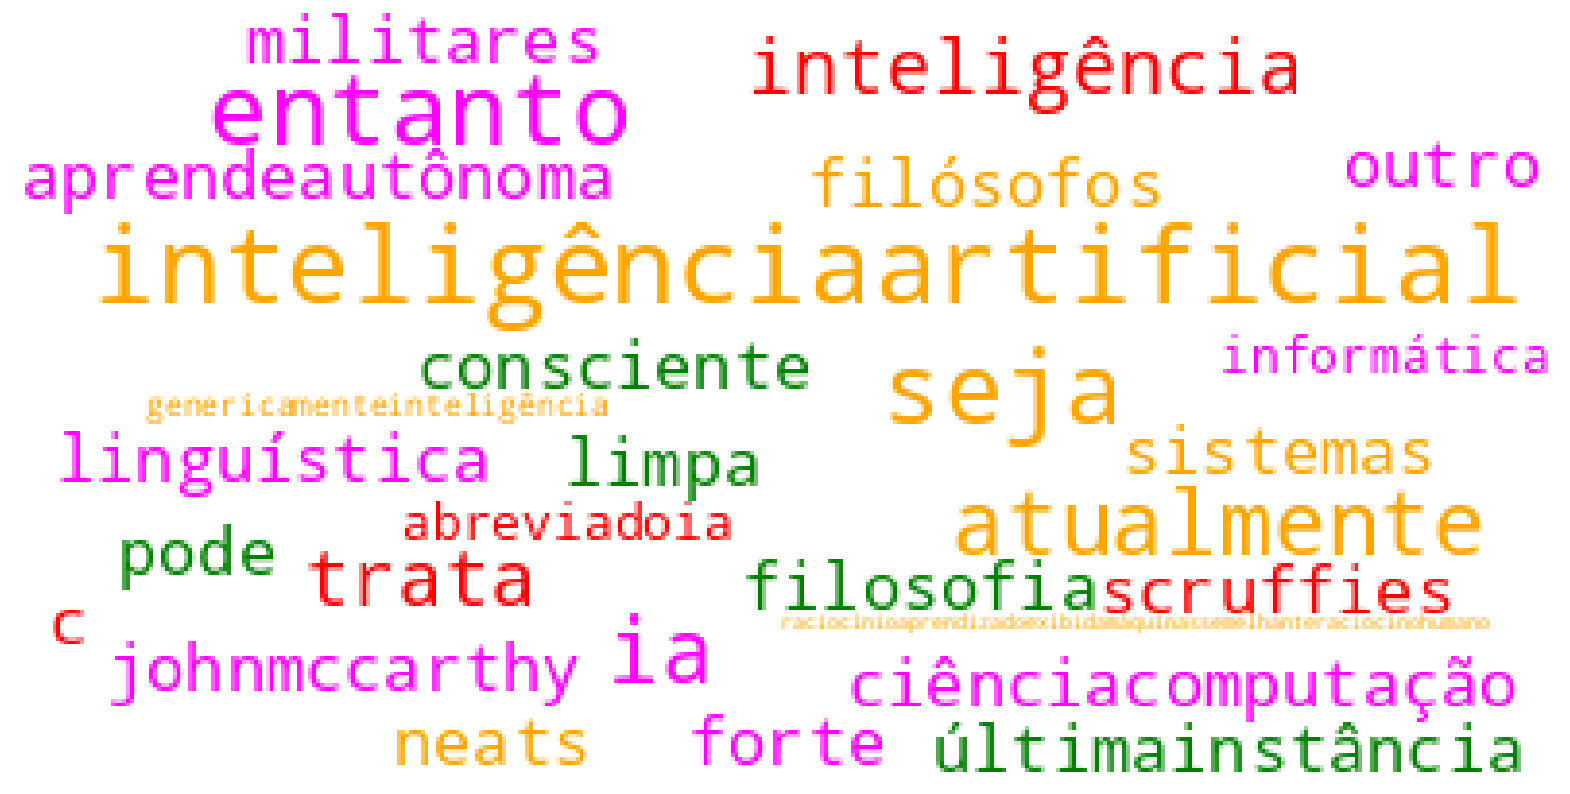

In [42]:
cloud = cloud.generate(''.join(sem_stop))
plt.figure(figsize=(20,20))
plt.imshow(cloud)
plt.axis('off')
plt.show()